In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C://Users/Asus/Downloads/archive (3)/ecommerce_sales_analysis.csv')

In [4]:
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [5]:
df.shape

(1000, 18)

In [6]:
df.isna().sum()

product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

In [7]:
df.dtypes

product_id          int64
product_name       object
category           object
price             float64
review_score      float64
review_count        int64
sales_month_1       int64
sales_month_2       int64
sales_month_3       int64
sales_month_4       int64
sales_month_5       int64
sales_month_6       int64
sales_month_7       int64
sales_month_8       int64
sales_month_9       int64
sales_month_10      int64
sales_month_11      int64
sales_month_12      int64
dtype: object

Creating a new column named total_sales to calculate the total sales from month_1 to month_12.

In [9]:
df['total_sales'] = df.loc[:, 'sales_month_1':'sales_month_12'].sum(axis=1)

Creating a column total_revenue 

In [11]:
df['total_revenue'] = df['price'] * df['total_sales']


In [12]:
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales,total_revenue
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421,1222558.40
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027,2866441.20
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580,2049757.20
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022,1513329.48
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094,501109.62


In [13]:
category_sales=df.groupby('category')['total_sales'].sum().reset_index()

In [14]:
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales,total_revenue
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421,1222558.40
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027,2866441.20
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580,2049757.20
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022,1513329.48
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094,501109.62


## Top-performing product categories


In [16]:
category_sales=category_sales.sort_values(by='total_sales', ascending=False)


In [17]:
print(category_sales.head())

      category  total_sales
0        Books       938229
6         Toys       917101
5       Sports       916371
2  Electronics       845120
3       Health       834414


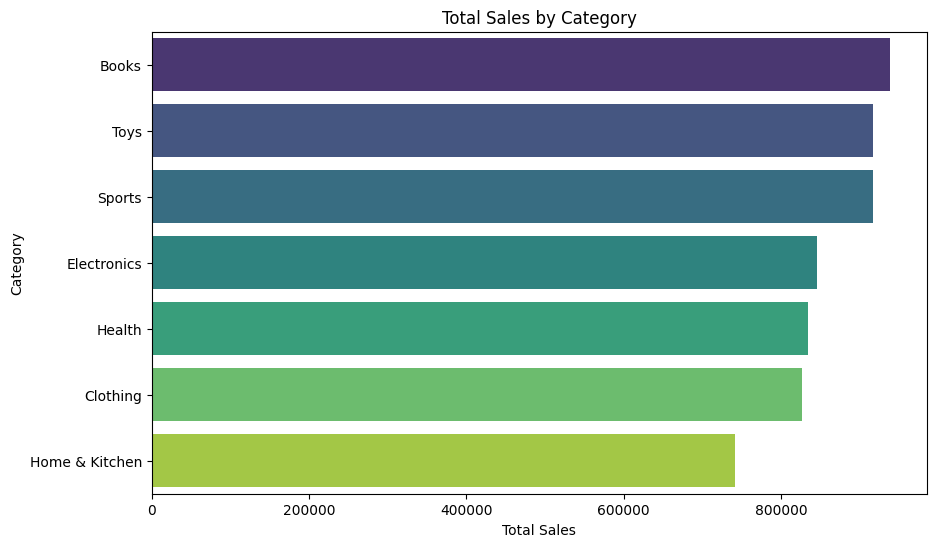

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales', y='category', data=category_sales, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()

## Correlation between Price and Revenue


In [20]:
price_revenue_corr = df['price'].corr(df['total_revenue'])
print(f"Correlation between Price and Total Revenue: {price_revenue_corr}")


Correlation between Price and Total Revenue: 0.9500234742483404


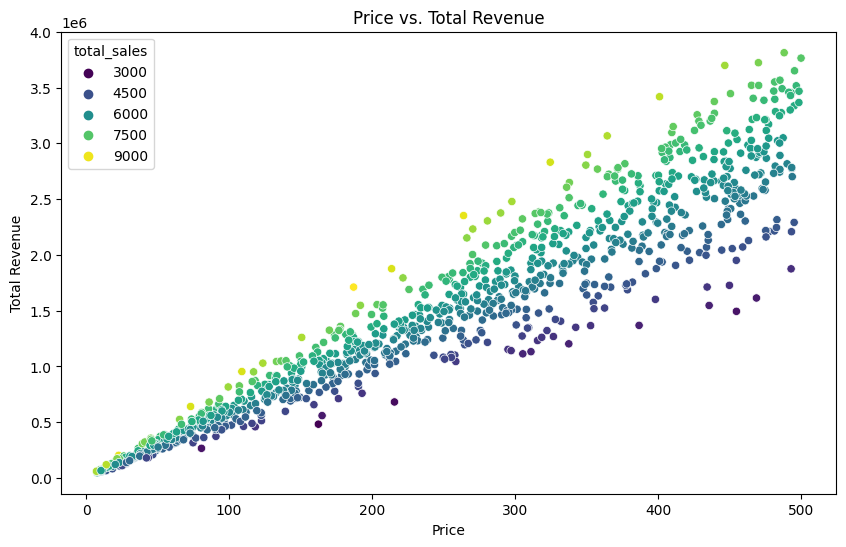

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='total_revenue', hue='total_sales', data=df, palette='viridis')
plt.title('Price vs. Total Revenue')
plt.xlabel('Price')
plt.ylabel('Total Revenue')
plt.show()


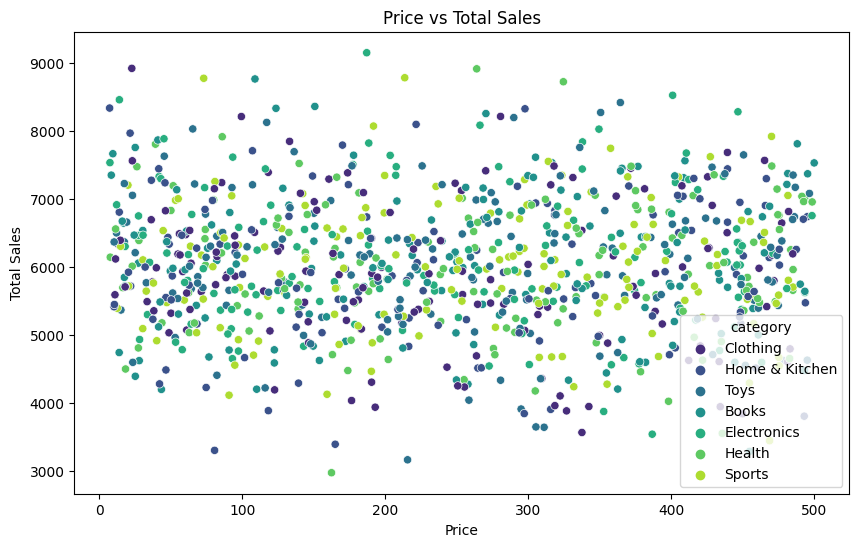

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='total_sales', hue='category', data=df, palette='viridis')
plt.title('Price vs Total Sales')
plt.xlabel('Price')
plt.ylabel('Total Sales')
plt.show()

In [23]:
price_sales_corr=df['price'].corr(df['total_sales'])
print(f'Correlation between Price and Total Sales: {price_sales_corr}')

Correlation between Price and Total Sales: -0.01597759612560892


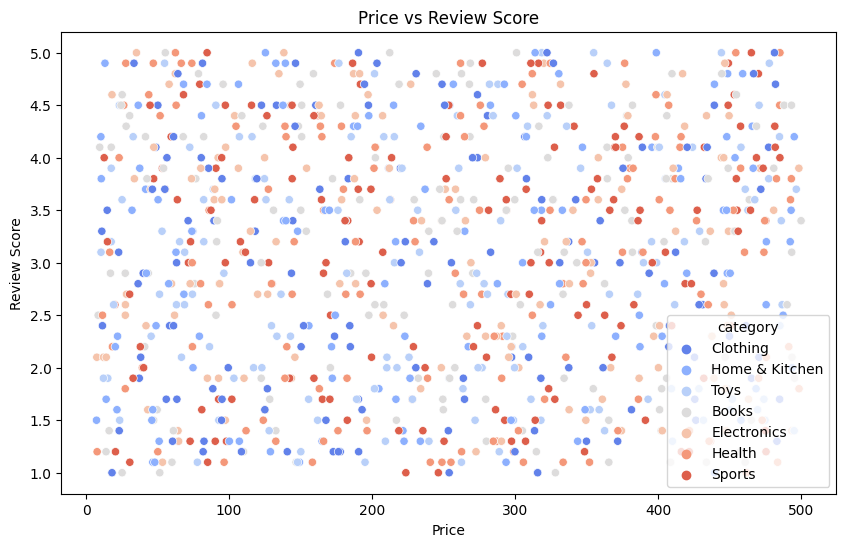

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='review_score',hue='category', data=df, palette='coolwarm')
plt.title('Price vs Review Score')
plt.xlabel('Price')
plt.ylabel('Review Score')
plt.show()

In [25]:
price_review_corr=df['price'].corr(df['review_score'])
print(f'Correlation between Price and Review Score: {price_review_corr}')

Correlation between Price and Review Score: 0.02895978542431917


In [26]:
review_sales_corr =df['review_score'].corr(df['total_sales'])
print(f'Correlation between Review Score and Total Sales: {review_sales_corr}')

Correlation between Review Score and Total Sales: -0.018186217589286485


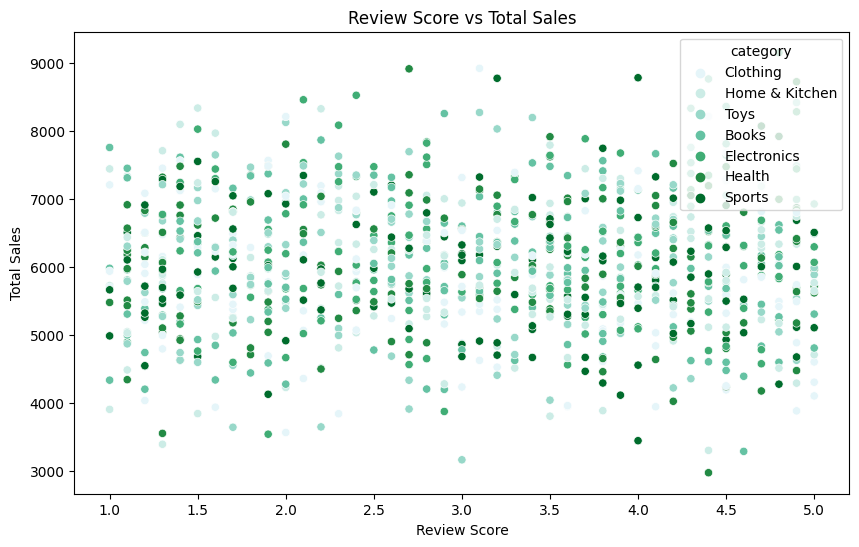

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_score', y='total_sales',hue='category', data=df, palette='BuGn')
plt.title('Review Score vs Total Sales')
plt.xlabel('Review Score')
plt.ylabel('Total Sales')
plt.show()

In [28]:
monthly_sales=df.loc[:, 'sales_month_1':'sales_month_12'].sum()

In [29]:
monthly_sales

sales_month_1     498306
sales_month_2     507661
sales_month_3     506739
sales_month_4     503823
sales_month_5     487194
sales_month_6     491653
sales_month_7     507011
sales_month_8     504569
sales_month_9     491934
sales_month_10    514798
sales_month_11    505838
sales_month_12    500386
dtype: int64

## Sales Trend


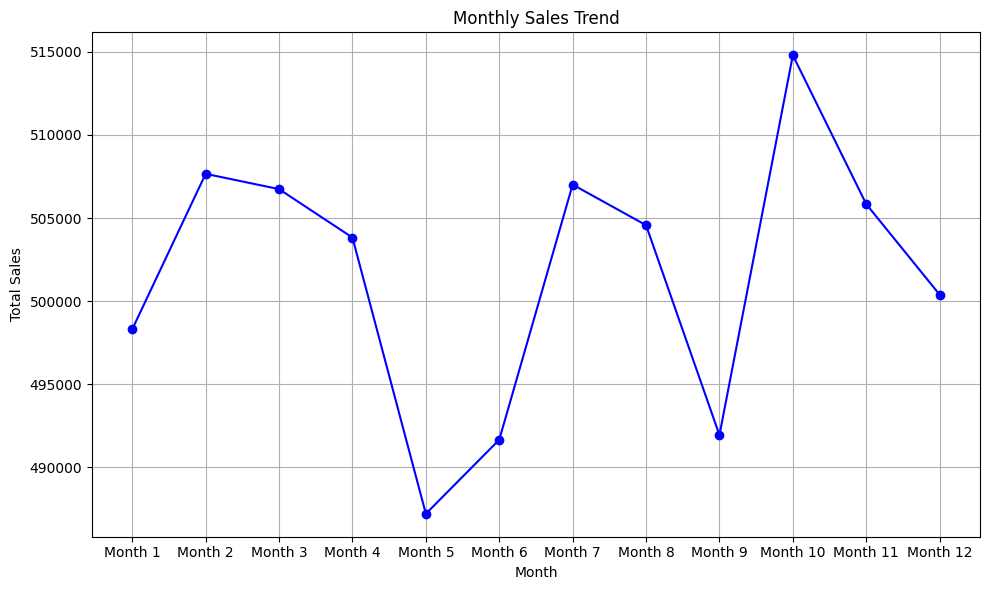

In [31]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(range(12), [f'Month {i+1}' for i in range(12)]) 
plt.tight_layout()
plt.show()

## Review Score Distribution


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


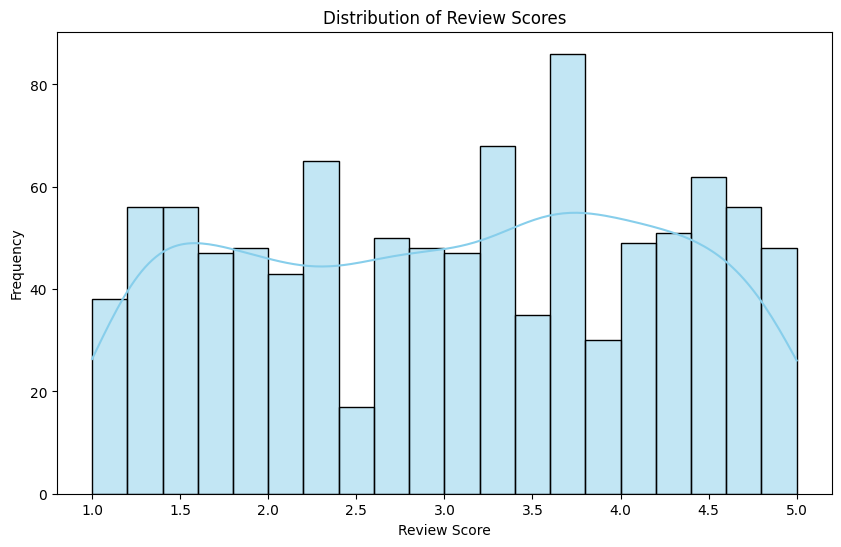

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['review_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_16940\204212398.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='review_count', y='review_score', data=df, palette='coolwarm')


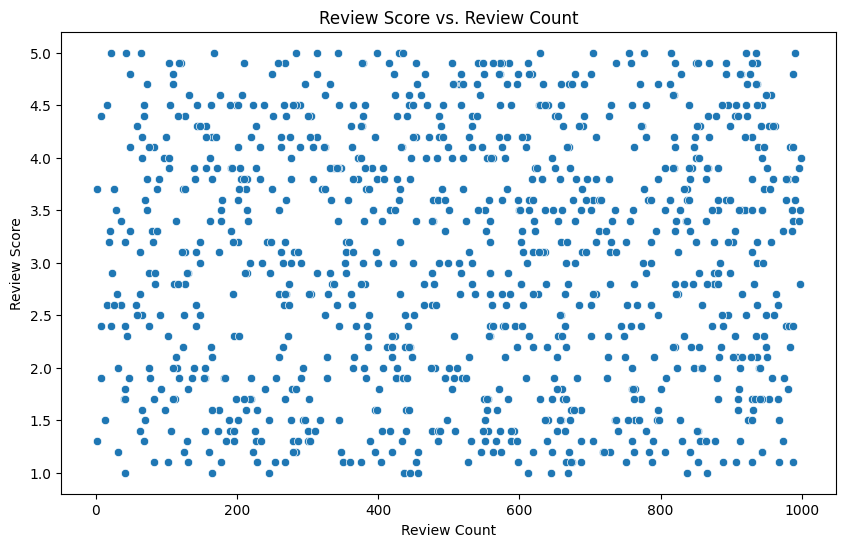

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_count', y='review_score', data=df, palette='coolwarm')
plt.title('Review Score vs. Review Count')
plt.xlabel('Review Count')
plt.ylabel('Review Score')
plt.show()


## Average Review Scores by Category


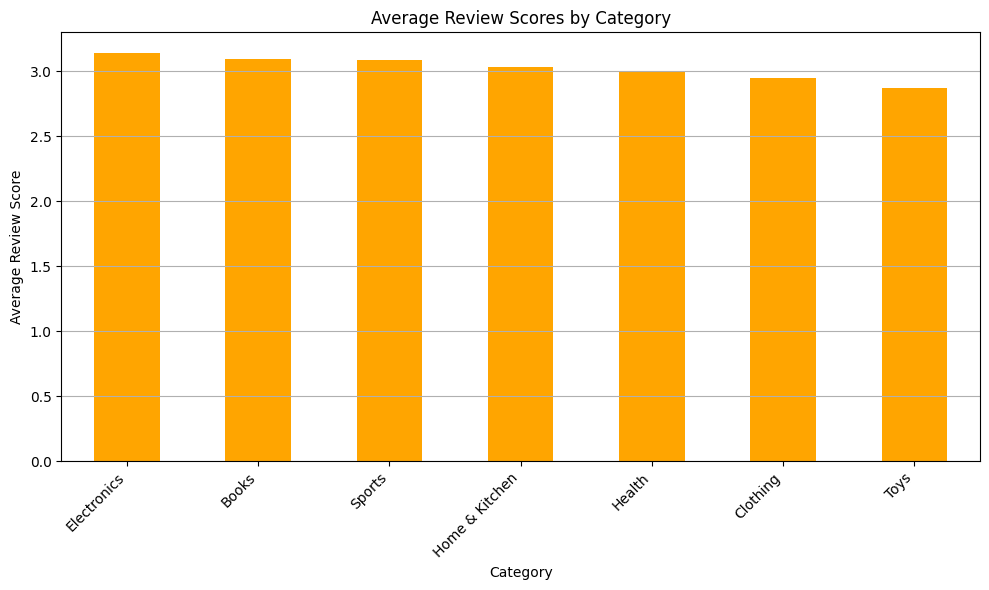

In [36]:
avg_reviewscores_category = df.groupby('category')['review_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_reviewscores_category.plot(kind='bar', color='orange')
plt.title('Average Review Scores by Category')
plt.xlabel('Category')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Price by Category


In [38]:
category_price=df.groupby('category')['price'].sum().reset_index()
category_price=category_price.sort_values(by='price', ascending=False)
print(category_price.head())

      category     price
5       Sports  38895.09
0        Books  38713.26
6         Toys  37961.85
3       Health  36854.82
2  Electronics  33075.05


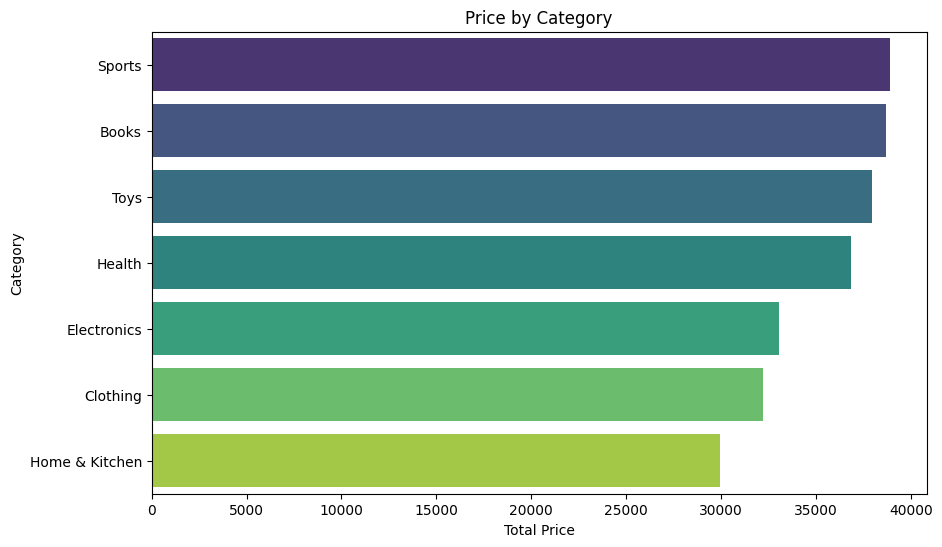

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='category', data=category_price, palette='viridis')
plt.title('Price by Category')
plt.xlabel('Total Price')
plt.ylabel('Category')
plt.show()

## Top 10 Best-Selling Poducts and Categories


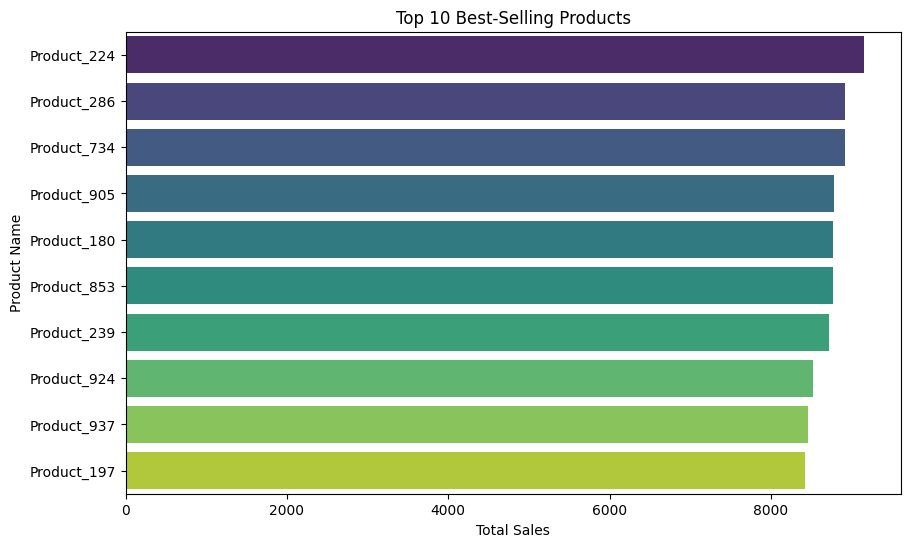

In [41]:
top_10_products=df.nlargest(10, 'total_sales')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_products, x='total_sales', y='product_name', palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

In [42]:
top_10_products=df.nlargest(10, 'total_sales')
top_10_products 

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales,total_revenue
223,224,Product_224,Electronics,187.02,4.8,613,827,749,510,796,784,352,976,918,873,601,857,908,9151,1711420.02
285,286,Product_286,Clothing,22.79,3.1,728,951,933,701,786,600,572,825,834,596,573,710,840,8921,203309.59
733,734,Product_734,Health,263.92,2.7,30,366,992,375,993,857,782,165,851,941,908,715,969,8914,2352582.88
904,905,Product_905,Sports,213.61,4.0,520,850,967,941,833,965,785,977,332,399,627,696,411,8783,1876136.63
179,180,Product_180,Sports,73.07,3.2,268,725,756,405,598,757,923,598,833,909,985,717,569,8775,641189.25
852,853,Product_853,Books,108.90,4.4,305,80,1000,641,918,807,905,686,804,1000,732,318,874,8765,954508.50
238,239,Product_239,Health,324.51,4.9,575,875,864,660,723,561,844,836,731,548,860,811,411,8724,2831025.24
923,924,Product_924,Electronics,400.93,2.4,758,992,746,783,995,651,821,800,656,726,495,67,793,8525,3417928.25
936,937,Product_937,Electronics,14.10,2.1,883,957,510,885,918,734,91,692,716,383,913,770,890,8459,119271.90
196,197,Product_197,Toys,364.35,4.9,104,576,962,972,371,928,220,748,343,848,742,946,762,8418,3067098.30


In [43]:
top_10_categories=top_10_products['category'].value_counts()

In [44]:
top_10_categories

category
Electronics    3
Health         2
Sports         2
Clothing       1
Books          1
Toys           1
Name: count, dtype: int64

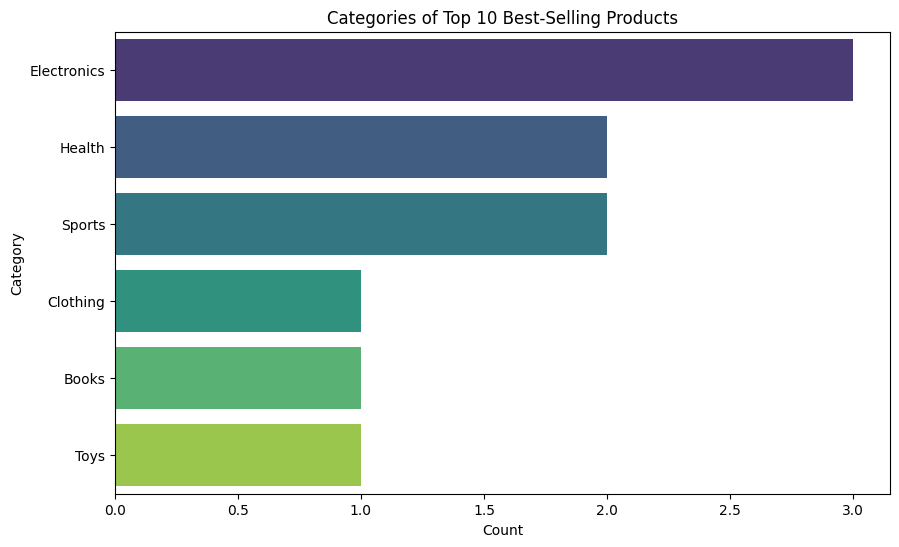

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis')
plt.title('Categories of Top 10 Best-Selling Products')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

## Conclusion

* The analysis provides actionable insights to drive sales growth, enhance customer satisfaction, and optimize inventory management.
* Data-driven strategies, such as targeted marketing, pricing adjustments, and focusing on successful categories, can significantly improve business performance.


In [87]:
df.to_csv('modified_dataset.csv', index=False)

In [89]:
from IPython.display import FileLink
FileLink('modified_dataset.csv')


C:\Users\Asus\modified_dataset.csv

In [91]:
# Save the DataFrame to an Excel file
df.to_excel('modified_dataset.xlsx', index=False)
